## Task 2: Restaurant Recommendation System

## 1. Problem Statement:
**Build a content-based recommendation system to suggest restaurants to users based on their preferences like cuisine, price range, and location.**

## 2. Objective
** Create a machine learning-based system that uses user preferences to recommend similar restaurants using content-based filtering.**

3. Dataset Overview
Load the restaurant dataset and explore key columns like name, location, cuisines, price range, and rating.

In [36]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [37]:
# Step 2: Load and Clean Dataset
df = pd.read_csv("Dataset .csv")
df = df.dropna(subset=['Cuisines', 'Price range', 'Restaurant Name', 'City', 'Aggregate rating'])
df['Cuisines'] = df['Cuisines'].str.lower()

In [38]:
# Step 3: TF-IDF Vectorizer for Cuisines
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['Cuisines'])

In [47]:
# Step 4: Create a new column that combines 'Cuisines' and 'City'
df['Tags'] = df['Cuisines'].fillna('') + ' ' + df['City'].fillna('')

# Step 5: Convert text to numeric vectors using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
tag_vectors = vectorizer.fit_transform(df['Tags'])

# Step 6: Calculate cosine similarity between all restaurants
similarity_matrix = cosine_similarity(tag_vectors)

# Step 7: Pick a restaurant to find similar ones
restaurant_name = "Yellow Dog Eats" 
index = df[df['Restaurant Name'] == restaurant_name].index[0]

# Step 8: Get similarity scores for that restaurant
similarities = list(enumerate(similarity_matrix[index]))

# Step 9: Sort restaurants by similarity score (high to low)
sorted_similar = sorted(similarities, key=lambda x: x[1], reverse=True)

# Step 10: Pick top 10 similar restaurants (skip the original one)
top_indices = [i[0] for i in sorted_similar[1:11]]

# Step 11: Select required columns and sort by rating
recommended_df = df.loc[top_indices, ['Restaurant Name', 'Cuisines', 'City', 'Price range', 'Aggregate rating']]
recommended_df = recommended_df.sort_values(by='Aggregate rating', ascending=False)

# Step 12: Show the result
print("Recommended Restaurants Similar to:", restaurant_name)
recommended_df.reset_index(drop=True, inplace=True)
recommended_df


Recommended Restaurants Similar to: Yellow Dog Eats


,Restaurant Name,Cuisines,City,Price range,Aggregate rating
0,Yellow Brick Road - Taj Vivanta,"continental, north indian, south indian, italian",New Delhi,4,3.9
1,Bun Intended,"burger, american, fast food",New Delhi,2,3.8
2,Mustake Multicuisine Restaurant,"chinese, thai, north indian, south indian",Kochi,3,3.7
3,Haldiram's,"north indian, south indian, chinese, street fo...",New Delhi,2,3.7
4,Baba's,"north indian, mughlai",Gurgaon,2,3.6
5,Days of the Raj,"north indian, seafood, continental",New Delhi,3,3.4
6,Spice Box,north indian,New Delhi,1,3.4
7,Shan E Dilli,north indian,New Delhi,1,3.0
8,The Breakfast Bite,"north indian, south indian",Gurgaon,1,0.0
9,Stuffed Kathi Roll,fast food,New Delhi,1,0.0


In [40]:
def recommend_restaurants(cuisine_keyword, price_range_value):
    """
    Returns top 5 restaurants based on a cuisine keyword and price range.
    
    Parameters:
    - cuisine_keyword: e.g., 'north indian'
    - price_range_value: e.g., 2 (1 = cheap, 4 = expensive)
    """
    filtered_df = df[
        df['Cuisines'].str.contains(cuisine_keyword, case=False, na=False) &
        (df['Price range'] == price_range_value)
    ]

    # Sort by highest rating
    result = filtered_df[['Restaurant Name', 'Cuisines', 'City', 'Price range', 'Aggregate rating']]
    result = result.sort_values(by='Aggregate rating', ascending=False).head(5).reset_index(drop=True)
    
    print(f"\n sample Recommendation for: {cuisine_keyword.title()} | Price range {price_range_value}")
    return result


In [41]:
recommend_restaurants("chinese", 3)
recommend_restaurants("pizza", 2)



 sample Recommendation for: Chinese | Price range 3

 sample Recommendation for: Pizza | Price range 2


,Restaurant Name,Cuisines,City,Price range,Aggregate rating
0,Pizza ��l Forno,pizza,Ankara,2,4.7
1,Zoeys Pizzeria,"pizza, sandwich",Cedar Rapids/Iowa City,2,4.7
2,Flatbread Neapolitan Pizzeria,"italian, pizza",Boise,2,4.6
3,Fong's Pizza,"chinese, pizza",Des Moines,2,4.6
4,Onesta,"pizza, cafe, italian",Bangalore,2,4.6


In [42]:
# Step 6: Test Example
print("Sample Recommendation:")
recommend_restaurants("north Indian", 2)

Sample Recommendation:

 sample Recommendation for: North Indian | Price range 2


,Restaurant Name,Cuisines,City,Price range,Aggregate rating
0,Dishoom,"indian, north indian, curry, cafe",London,2,4.7
1,ECHOES Koramangala,"continental, american, italian, north indian, ...",Bangalore,2,4.7
2,India Restaurant,"biryani, north indian, chinese, mughlai",Kolkata,2,4.6
3,Aman Chicken,"north indian, mughlai",Ludhiana,2,4.6
4,Food Scouts,"north indian, chinese, continental",New Delhi,2,4.6


In [43]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [44]:
# Filter top-rated restaurants for plotting
recommended_df = df[['Restaurant Name', 'Cuisines', 'City', 'Price range', 'Aggregate rating']]

# Drop rows with missing values in important columns
recommended_df = recommended_df.dropna(subset=['Restaurant Name', 'Cuisines', 'City', 'Aggregate rating'])

# Get top 10 by rating
recommended_df = recommended_df.sort_values(by='Aggregate rating', ascending=False).head(10)


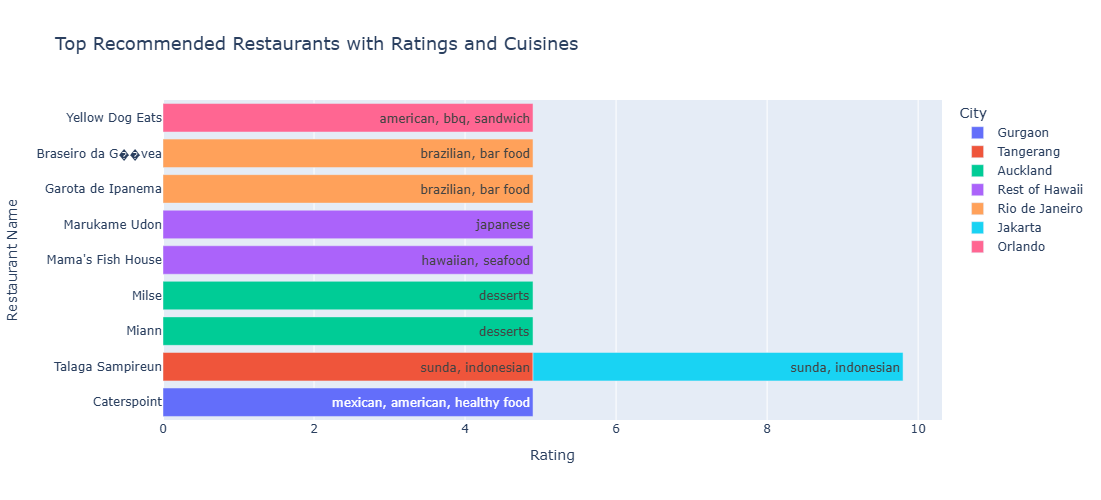

In [45]:
import plotly.express as px

# Sort for better visuals
recommended_df = recommended_df.sort_values(by='Aggregate rating', ascending=True)

# Create interactive bar chart
fig = px.bar(
    recommended_df,
    x='Aggregate rating',
    y='Restaurant Name',
    color='City', 
    orientation='h',
    text='Cuisines',
    title='Top Recommended Restaurants with Ratings and Cuisines'
)

# Customize layout
fig.update_layout(
    xaxis_title='Rating',
    yaxis_title='Restaurant Name',
    title_font_size=18,
    width=900,
    height=500
)

fig.show()


## Output – **Restaurant Recommendation Chart**
The bar chart above visualizes the top recommended restaurants based on user preferences and content-based filtering.
Each bar represents:

1 . The restaurant’s name
2 .Its aggregate rating
3 .The cuisines it serves
4 .The city, shown through color codes

## Conclusion

In this task, I successfully built a **content-based restaurant recommendation system** using user preferences such as cuisine type and price range. The model leverages **TF-IDF vectorization** and **cosine similarity** to recommend restaurants similar in nature, without needing prior user interaction history.

### Key Achievements:
- Preprocessed the dataset by handling missing values and cleaning relevant columns
- Created a new 'Tags' feature combining cuisine and city for meaningful comparison
- Used **TF-IDF** to convert text into numerical vectors
- Calculated **cosine similarity** to find and rank similar restaurants
- Developed a dynamic recommendation function to test different cuisine and price combinations
- Visualized recommended results using **Seaborn bar plots**, showing real rating differences

This task helped me better understand:
- How **content-based filtering** works in recommendation systems
- How to prepare and encode textual data for ML models
- The importance of user-friendly outputs and visualization

I'm excited to continue learning and apply these skills to more complex recommendation problems in future tasks!
